In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Dataset-SA.csv")
#top 5 rows
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [5]:
#last 5 rows
df.tail()

,product_name,product_price,Rate,Review,Summary,Sentiment
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive
205051,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4,value-for-money,very good but mixing bowl not included is one ...,neutral


In [6]:
#shape of the df
df.shape

(205052, 6)

In [7]:
#column list
df.columns.tolist()

['product_name', 'product_price', 'Rate', 'Review', 'Summary', 'Sentiment']

In [14]:
#count of unique products
len(df['product_name'].unique())

958

In [21]:
#unique values
df['Rate'].unique()

array(['5', '3', '1', '4', '2',
       'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)',
       'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron?Ã\x83Â¿?Ã\x83Â¿(Grey & Turquoise)'],
      dtype=object)

In [22]:
#checking basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [23]:
# Remove rows where 'Rate' is not a digit
df = df[df['Rate'].str.isdigit()]

# Convert 'Rate' column to numeric
df['Rate'] = pd.to_numeric(df['Rate'])

display(df['Rate'].unique())

/tmp/ipython-input-23-1304684753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rate'] = pd.to_numeric(df['Rate'])


array([5, 3, 1, 4, 2])

## Handle missing values



In [24]:
print(df['Review'].isnull().sum())
print(df['Summary'].isnull().sum())

24664
11


**Reasoning**:
Fill the missing values in the 'Review' and 'Summary' columns with an empty string and verify that there are no more missing values in these columns.



In [25]:
df['Review'] = df['Review'].fillna('')
df['Summary'] = df['Summary'].fillna('')

print(df['Review'].isnull().sum())
print(df['Summary'].isnull().sum())

0
0


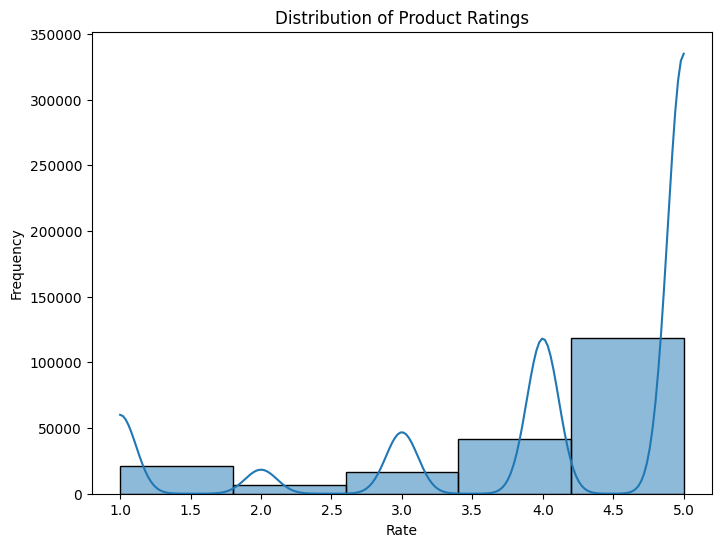

In [32]:
# prompt: add different visualizations for better understaing

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Rate'
plt.figure(figsize=(8, 6))
sns.histplot(df['Rate'], bins=5, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()



## Clean text data

Remove special characters, punctuation, and convert text to lowercase in the 'Review' and 'Summary' columns.


In [26]:
import re

def clean_text(text):
    """
    Cleans the input text by converting to lowercase and removing special characters.
    """
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['cleaned_review'] = df['Review'].apply(clean_text)
df['cleaned_summary'] = df['Summary'].apply(clean_text)

display(df.head())

,product_name,product_price,Rate,Review,Summary,Sentiment,cleaned_review,cleaned_summary
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,super,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,awesome,best budget 2 fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,fair,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,useless product,very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,fair,ok ok product


## Text vectorization
Convert the cleaned text data into a numerical format that can be used for model training (e.g., using TF-IDF or word embeddings).


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer for reviews
tfidf_reviews = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the 'cleaned_review' column
X_reviews = tfidf_reviews.fit_transform(df['cleaned_review'])

# Instantiate TfidfVectorizer for summaries
tfidf_summaries = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))

# Fit and transform the 'cleaned_summary' column
X_summaries = tfidf_summaries.fit_transform(df['cleaned_summary'])

print("Shape of TF-IDF matrix for reviews:", X_reviews.shape)
print("Shape of TF-IDF matrix for summaries:", X_summaries.shape)

Shape of TF-IDF matrix for reviews: (205049, 4253)
Shape of TF-IDF matrix for summaries: (205049, 3000)


Concatenate the TF-IDF matrices for reviews and summaries into a single feature matrix.



In [28]:
from scipy.sparse import hstack

# Concatenate the TF-IDF matrices
X_combined = hstack([X_reviews, X_summaries])

print("Shape of combined TF-IDF matrix:", X_combined.shape)

Shape of combined TF-IDF matrix: (205049, 7253)


## Model training
Train a sentiment analysis model using the preprocessed data.


In [29]:
#Split the data into training and testing sets and train a Logistic Regression model.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, df['Sentiment'], test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Model evaluation




Evaluate the performance of the trained model by making predictions on the test data, calculating accuracy, generating a classification report, and displaying a confusion matrix.



Accuracy: 0.9448
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.90      0.89      5478
     neutral       0.72      0.43      0.54      2078
    positive       0.97      0.98      0.97     33454

    accuracy                           0.94     41010
   macro avg       0.85      0.77      0.80     41010
weighted avg       0.94      0.94      0.94     41010



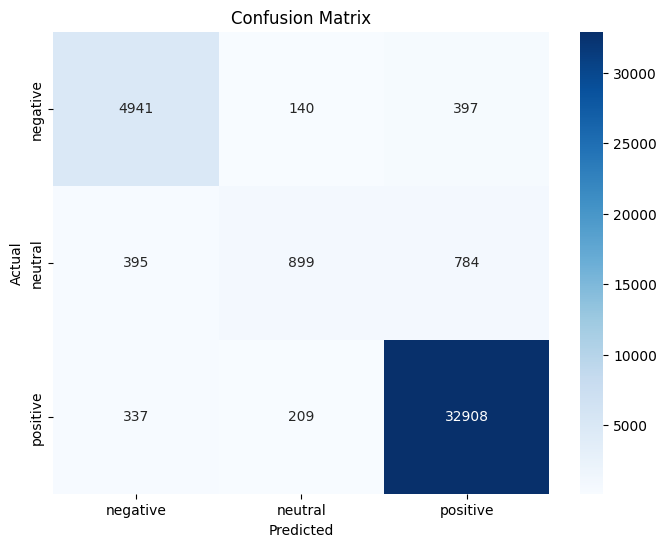

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Initially, there were 24,664 missing values in the 'Review' column and 11 in the 'Summary' column. These missing values were successfully filled with empty strings.
*   A text cleaning function was created and applied to the 'Review' and 'Summary' columns to convert text to lowercase and remove special characters, resulting in 'cleaned\_review' and 'cleaned\_summary' columns.
*   TF-IDF vectorization was applied to the cleaned text data. The TF-IDF matrix for reviews had a shape of (205049, 4253), and for summaries, it was (205049, 3000).
*   The review and summary TF-IDF matrices were combined, resulting in a feature matrix with a shape of (205049, 7253).
*   A Logistic Regression model was trained on the combined TF-IDF features and the sentiment labels.
*   The trained model achieved an overall accuracy of 0.9448 on the test set.
*   The model performed well on positive (F1-score: 0.97) and negative (F1-score: 0.89) sentiments but struggled with the neutral class (F1-score: 0.54), often misclassifying neutral reviews.

### Insights or Next Steps

*   Investigate techniques to improve the model's performance on the neutral sentiment class, potentially by exploring different feature engineering methods or alternative classification algorithms.
*   Consider collecting more balanced data if the class imbalance is contributing to the difficulty in classifying neutral reviews.
